# Alchex Demonstration Notebook

## Requirements

- Python 2.7
- MDAnalysis 0.13
- Matplotlib
- Numpy
- Scipy
- NetworkX
- GROMACS

## Configuration

You will need to set an appropriate `GMX EXECUTABLE` for your system. This is whatever you normally use to call GROMACS and usually `gmx`. If you encounter any problems, check that GROMACS is available on your system and use the output of `which gmx` instead.

In [11]:
GMX_EXECUTABLE = "gmx"

In [12]:
# Check if GROMACS is available
from subprocess import check_output, CalledProcessError
try:
    check_output(GMX_EXECUTABLE)
    print("Ready to go")
except CalledProcessError:
    print("Please check your GROMACS executable settings.")

Ready to go


In [13]:
import alchex.config
import alchex.logger
import demo_extras

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib notebook

In [14]:
demo_config = alchex.config.default_configuration()
demo_config.gromacs_executable = GMX_EXECUTABLE

In [15]:
demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "CHOL",
    to_moltype = "CHOL", 
    exchange_model="martini.static_planar_alignment", 
    draw=False, 
    clusters=[
        [
            ["PO4", "NH3"],
            ["ROH"],
            1
        ],
        [
            ["C1B", "C2A"],
            ["R2", "R4"],
            1
        ],
        [
            ["C4B", "C4A"],
            ["C2"],
            1
        ]
    ])

demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "POPG",
    to_moltype = "POPG", 
    exchange_model="martini.lipid",
    )
demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "PI3P",
    to_moltype = "PI3P", 
    exchange_model="martini.lipid",
    )
demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "PVPA",
    to_moltype = "PVPA", 
    exchange_model="martini.lipid",
    )
demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "CDL0",
    to_moltype = "CDL0", 
    exchange_model="martini.lipid_to_card"
    )

In [16]:
dppc         = demo_config.get_reference_structure("DPPC")
dlpg         = demo_config.get_reference_structure("DLPG")
chol         = demo_config.get_reference_structure("CHOL")
cdl0         = demo_config.get_reference_structure("CDL0")
cddg         = demo_config.get_reference_structure("CDDG")

dppc_to_dlpg = demo_config.get_exchange_map("DPPC", "DLPG")
dppc_to_chol = demo_config.get_exchange_map("DPPC", "CHOL")
dppc_to_cdl0 = demo_config.get_exchange_map("DPPC", "CDL0")
dppc_to_cddg = demo_config.get_exchange_map("DPPC", "CDDG")

print(dppc_to_dlpg)
print(dppc_to_chol)
print(dppc_to_cdl0)
print(dppc_to_cddg)

 〘 ⚗ Change 1x DPPC to 1x DLPG ☑☑☐☐☑ 〙 
 〘 ⚗ Change 1x DPPC to 1x CHOL ☐☐☑☐☐ 〙 
 〘 ⚗ Change 2x DPPC to 1x CDL0 ☑☑☐☑☑ 〙 
 〘 ⚗ Change 1x DPPC to 1x CDDG ☑☑☐☐☑ 〙 


<IPython.core.display.Javascript object>


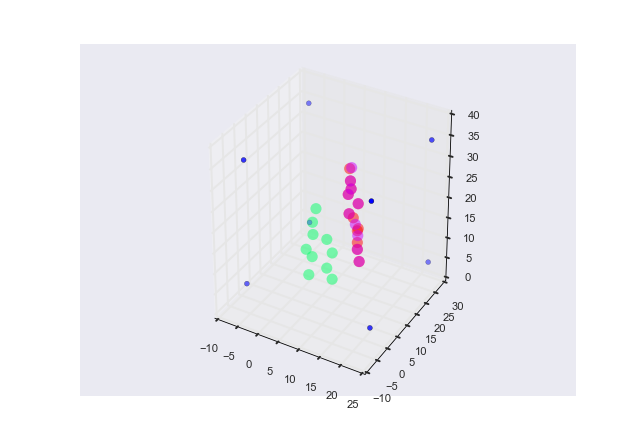

<IPython.core.display.Javascript object>


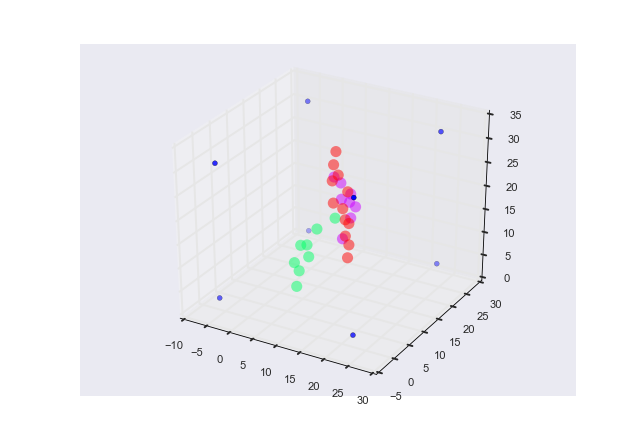

<IPython.core.display.Javascript object>


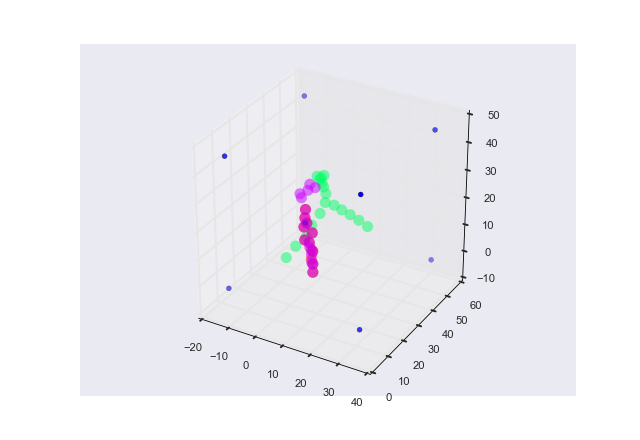

In [17]:
replaced = dppc_to_dlpg.run(dppc, dlpg, plot=True)
replaced = dppc_to_chol.run(dppc, chol, plot=True)
replaced = dppc_to_cddg.run(dppc, cddg, plot=True)

# Replace Molecules in a POPE Vesicle

This vesicle contains 877 POPE Molecules

In [18]:
from alchex.replacement import ReplacementSystem

In [19]:
vesicle = ReplacementSystem(
    alchex_config = demo_config,
    input_structure_filename="vesicle/pope_vesicle.gro",
    input_topology_filename="vesicle/pope_vesicle.top",
    root_folder="vesicle-test-run"
    )

vesicle.auto_replace({
    "selection": "leaflet inner",
    "composition" :{
        "DPPC" : 1,
        "DLPG" : 1,
        "CDL0" : 1
        }},
    {
    "selection": "leaflet outer",
    "composition" :{
        "POPS" : 3,
        "POPG" : 2,
        "CHOL" : 1
        }})

 ⚗ Replacing residues ┠██████████████████████████████████████████████████┨ 🌖  100.0%    



In [20]:
before, after = demo_extras.render_comparison()

## Original vesicle

In [21]:
display(before)

## Replaced, energy minimised vesicle

In [22]:
display(after)

# Messing around for the fun of it

In [23]:
vesicle = ReplacementSystem(
    alchex_config = demo_config,
    input_structure_filename="vesicle/pope_vesicle.gro",
    input_topology_filename="vesicle/pope_vesicle.top",
    root_folder="vesicle-test-run"
    )

vesicle.auto_replace({
    "selection": "resname POPE and leaflet inner and same resid as prop x < 85",
    "composition" :{
        "DPPC" : 1
        }},
    {
    "selection": "resname POPE and leaflet inner and same resid as prop x > 125",
    "composition" :{
        "POPG" : 1
        }},
    {
    "selection": "resname POPE and leaflet outer and same resid as prop y < 30",
    "composition" :{
        "POPS" : 1
        }},
    {
    "selection": "resname POPE and leaflet outer and same resid as prop y > 80",
    "composition" :{
        "DLPG" : 1
        }},
    {
    "selection": "resname POPE and leaflet outer and same resid as prop y > 110",
    "composition" :{
        "PVPA" : 1
        }},
    {
    "selection": "resname POPE and leaflet outer and same resid as prop y > 130",
    "composition" :{
        "PI3P" : 1
        }}
    )

 ⚗ Replacing residues ┠██████████████████████████████████████████████████┨ 🌘  100.0%    



In [24]:
before, after = demo_extras.render_comparison()

## Same old vesicle

In [25]:
display(before)

## Now with more awesome

In [26]:
display(after)